In [20]:
import pandas as pd

file_2004_path = r"C:\Users\Marcia Lopez\Desktop\pruebas\TP3\Individual_t104.dta"
file_2024_path = r"C:\Users\Marcia Lopez\Desktop\pruebas\TP3\usu_individual_T124.xlsx"

data_2004 = pd.read_stata(file_2004_path, convert_categoricals=False) #para que lea los valores y no las etiquetas
data_2024 = pd.read_excel(file_2024_path)

data_2004.columns = data_2004.columns.str.lower()
data_2024.columns = data_2024.columns.str.lower()

In [21]:
print(data_2004.head())

     codusu  nro_hogar  componente  h15    ano4  trimestre  region mas_500  \
0  125098          1.0         1.0  1.0  2004.0        1.0     1.0       S   
1  125397          1.0         1.0  1.0  2004.0        1.0     1.0       S   
2  125515          1.0         1.0  1.0  2004.0        1.0     1.0       S   
3  125558          1.0         1.0  1.0  2004.0        1.0     1.0       S   
4  125558          1.0         2.0  1.0  2004.0        1.0     1.0       S   

   aglomerado  pondera  ...  deccfr  ideccfr  rdeccfr  gdeccfr  pdeccfr  \
0        32.0   1299.0  ...      07                06       06            
1        32.0   2018.0  ...      00                00       00            
2        32.0   1486.0  ...      07                07       07            
3        32.0   1674.0  ...      08                08       08            
4        32.0   1674.0  ...      08                08       08            

   adeccfr  pj1_1  pj2_1  pj3_1  idimpp  
0       04    0.0    0.0    0.0   0000

In [22]:
print(data_2024.head())

                          codusu  ano4  trimestre  nro_hogar  componente  h15  \
0  TQRMNOPUTHLMKQCDEGGFB00852588  2024          1          1           3    1   
1  TQRMNOPUTHLMKQCDEGGFB00852588  2024          1          1           4    1   
2  TQRMNOPUTHLMKQCDEGGFB00852588  2024          1          1           5    0   
3  TQRMNOPPWHLLKRCDEGGFB00852574  2024          1          1           1    1   
4  TQRMNOPPWHLLKRCDEGGFB00852574  2024          1          1           2    1   

   region mas_500  aglomerado  pondera  ...  pdecifr  adecifr      ipcf  \
0      42       S          10      439  ...      NaN       12       0.0   
1      42       S          10      439  ...      NaN       12       0.0   
2      42       S          10      439  ...      NaN       12       0.0   
3      42       S          10      675  ...      NaN        8  212500.0   
4      42       S          10      675  ...      NaN        8  212500.0   

   deccfr  ideccfr  rdeccfr  gdeccfr  pdeccfr  adeccfr  pondih

In [23]:
# Aquí se van a filtrar por aglomerados de CABA (32) y Partidos del GBA (33)
CABA_GBA_codes = [32, 33]
data_2004_filtered = data_2004[data_2004['aglomerado'].isin(CABA_GBA_codes)]
data_2024_filtered = data_2024[data_2024['aglomerado'].isin(CABA_GBA_codes)]

In [24]:
# Unir ambas bases en un único DataFrame
# combined_data = pd.concat([data_2004_filtered, data_2024_filtered], ignore_index=True)
combined_data = pd.concat([data_2004_filtered, data_2024_filtered], keys=[2004, 2024])  # aquí agregué key

print(combined_data.head())

print(combined_data.info())

output_path = r"C:\Users\Marcia Lopez\Desktop\pruebas\TP3\combined_data_bruto.csv"
combined_data.to_csv(output_path, index=False)

          codusu  nro_hogar  componente  h15    ano4  trimestre  region  \
2004 0  125098          1.0         1.0  1.0  2004.0        1.0     1.0   
     1  125397          1.0         1.0  1.0  2004.0        1.0     1.0   
     2  125515          1.0         1.0  1.0  2004.0        1.0     1.0   
     3  125558          1.0         1.0  1.0  2004.0        1.0     1.0   
     4  125558          1.0         2.0  1.0  2004.0        1.0     1.0   

       mas_500  aglomerado  pondera  ...  adeccfr  pj1_1  pj2_1  pj3_1  \
2004 0       S        32.0   1299.0  ...       04    0.0    0.0    0.0   
     1       S        32.0   2018.0  ...       00    0.0    0.0    0.0   
     2       S        32.0   1486.0  ...       05    0.0    0.0    0.0   
     3       S        32.0   1674.0  ...       06    0.0    0.0    0.0   
     4       S        32.0   1674.0  ...       06    0.0    0.0    0.0   

        idimpp  ch05  imputa  pondiio  pondii  pondih  
2004 0   00000   NaN     NaN      NaN     NaN   

In [26]:
# Limpieza de datos: se eliminan las observaciones con valores no válidos
# 1. 'ipcf' >= 0: lo limpio porque el ingreso per cápita no puede ser negativo
# 2. 'ch06' entre 0 y 110: rango razonable para edad

# Convertir a numérico, poniendo NaN en los valores no numéricos,
data_2004_filtered.loc[:, 'ch06'] = pd.to_numeric(data_2004_filtered['ch06'], errors='coerce') # uso. loc para que pandas sepa que modifico una columna en particular

# Eliminar filas donde CH06 sea NaN (es decir, valores no numéricos)
data_2004_filtered = data_2004_filtered.dropna(subset=['ch06'])

In [27]:
combined_data = combined_data[
    (combined_data['ipcf'] >= 0) &  # Ingreso válido
    (combined_data['ch06'] >= 0) &  # Edad mínima
    (combined_data['ch06'] <= 110)  # Edad máxima razonable
]

In [28]:
# Mostrar información del DataFrame combinado
print(combined_data.info())
print(combined_data.head())

# Cambiar la ruta del archivo de salida
output_path = r"C:\Users\Marcia Lopez\Desktop\pruebas\TP3\combined_data_cleaned.csv"
combined_data.to_csv(output_path, index=False)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 14516 entries, (np.int64(2004), np.int64(0)) to (np.int64(2024), np.int64(46049))
Columns: 181 entries, codusu to pondih
dtypes: float64(144), object(37)
memory usage: 20.7+ MB
None
          codusu  nro_hogar  componente  h15    ano4  trimestre  region  \
2004 0  125098          1.0         1.0  1.0  2004.0        1.0     1.0   
     1  125397          1.0         1.0  1.0  2004.0        1.0     1.0   
     2  125515          1.0         1.0  1.0  2004.0        1.0     1.0   
     3  125558          1.0         1.0  1.0  2004.0        1.0     1.0   
     4  125558          1.0         2.0  1.0  2004.0        1.0     1.0   

       mas_500  aglomerado  pondera  ...  adeccfr  pj1_1  pj2_1  pj3_1  \
2004 0       S        32.0   1299.0  ...       04    0.0    0.0    0.0   
     1       S        32.0   2018.0  ...       00    0.0    0.0    0.0   
     2       S        32.0   1486.0  ...       05    0.0    0.0    0.0   
     3       S       

In [29]:
missing_data = combined_data.isnull().mean() * 100
print(missing_data[missing_data > 0].sort_values(ascending=False))

imputa     99.469551
ch05       51.777349
pondiio    51.777349
pondii     51.777349
pondih     51.777349
             ...    
pp08f2     26.012676
pp08j3     26.012676
pp08j2     26.012676
ch14       25.041334
p47t        0.282447
Length: 111, dtype: float64


In [30]:
print(combined_data[['ipcf', 'pondera']].describe())

               ipcf       pondera
count  1.451600e+04  14516.000000
mean   7.759574e+04   1931.660375
std    2.796873e+05    900.573050
min    0.000000e+00     42.000000
25%    5.714286e+01   1441.000000
50%    2.666667e+02   1685.500000
75%    5.808333e+04   2237.000000
max    1.131233e+07   8685.000000


count    14516.000000
mean        36.112497
std         22.662698
min          1.000000
25%         17.000000
50%         33.000000
75%         53.000000
max         98.000000
Name: ch06, dtype: float64


<Axes: title={'center': 'Distribución de edades'}, ylabel='Frequency'>

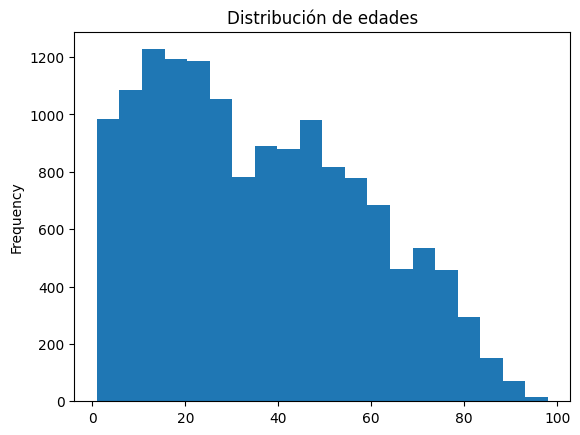

In [31]:
print(combined_data['ch06'].describe())

combined_data['ch06'].plot(kind='hist', bins=20, title='Distribución de edades')

In [32]:
# Seleccionar aleatoriamente filas de las columnas ch04 y an04 para verificar la composición de las variables a graficar
random_sample = combined_data[['ch04', 'ano4']].sample(n=20)

# Mostrar el resultado
print(random_sample)

            ch04    ano4
2004 2426    2.0  2004.0
     4590    2.0  2004.0
     5825    1.0  2004.0
2024 33308   1.0  2024.0
     26203   2.0  2024.0
     26210   1.0  2024.0
     44517   2.0  2024.0
2004 6939    2.0  2004.0
     6369    2.0  2004.0
     4951    1.0  2004.0
     3955    2.0  2004.0
2024 6581    1.0  2024.0
2004 3805    1.0  2004.0
2024 23389   1.0  2024.0
2004 2691    2.0  2004.0
     1723    2.0  2004.0
     4697    1.0  2004.0
2024 25309   2.0  2024.0
2004 3957    2.0  2004.0
     1819    1.0  2004.0


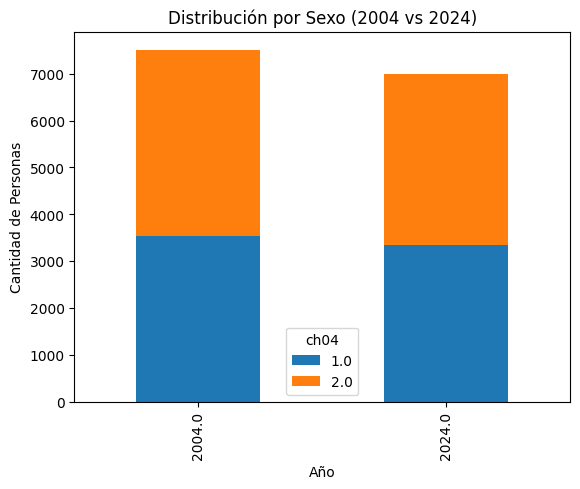

In [33]:
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns  

# Gráfico de barras por sexo
combined_data['AÑO'] = combined_data.index.get_level_values(0)
sexo_counts = combined_data.groupby(['ano4', 'ch04']).size().unstack()

sexo_counts.plot(kind='bar', stacked=True)
plt.title('Distribución por Sexo (2004 vs 2024)')
plt.ylabel('Cantidad de Personas')
plt.xlabel('Año')
plt.show()

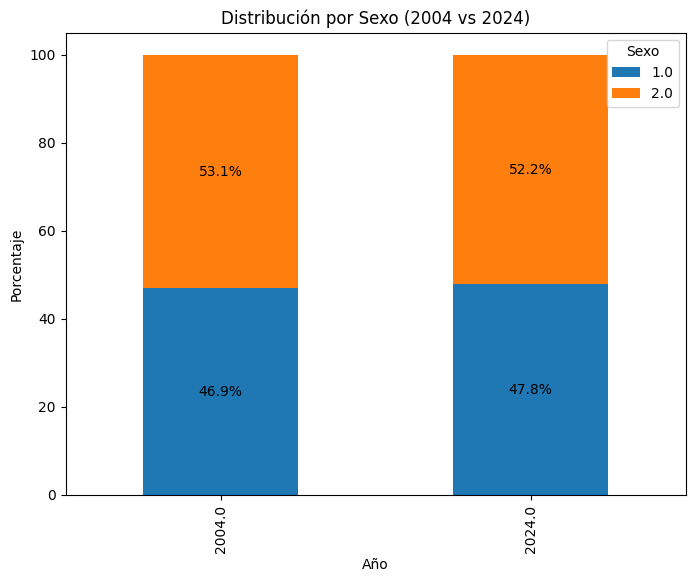

In [34]:
# Calcular los porcentajes
sexo_percentages = sexo_counts.div(sexo_counts.sum(axis=1), axis=0) * 100

# Crear el gráfico
ax = sexo_percentages.plot(kind='bar', stacked=True, figsize=(8, 6))

# Añadir porcentajes a las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

# Personalizar el gráfico
plt.title('Distribución por Sexo (2004 vs 2024)')
plt.ylabel('Porcentaje')
plt.xlabel('Año')
plt.legend(title='Sexo', loc='upper right')
plt.show()

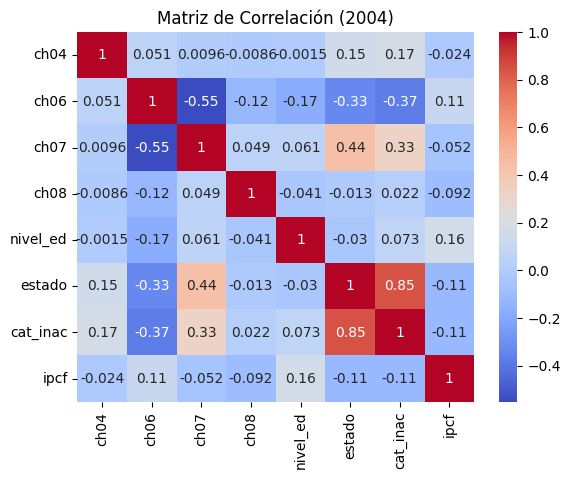

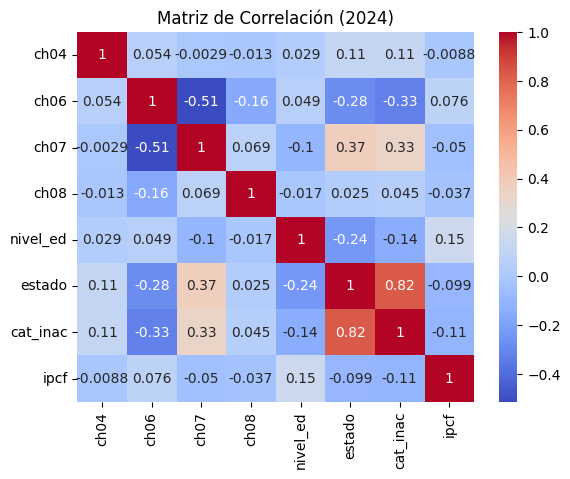

In [35]:
# Seleccionar variables de interés
variables_interes = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']

# Matriz de correlación por año
for año in [2004, 2024]:
    # Filtrar los datos por año y seleccionar las variables de interés
    data_year = combined_data.loc[año, variables_interes].dropna()
    
    # Calcular la matriz de correlación
    corr_matrix = data_year.corr()
    
    # Graficar la matriz de correlación
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Matriz de Correlación ({año})')
    plt.show()

In [36]:
# Desocupados, inactivos y media de ingresos por estado
desocupados = combined_data[combined_data['estado'] == 2].shape[0]
inactivos = combined_data[combined_data['estado'] == 3].shape[0]

ingresos_por_estado = combined_data.groupby('estado')['ipcf'].mean()

print(f"Desocupados: {desocupados}")
print(f"Inactivos: {inactivos}")
print("Media de ingresos por estado:")
print(ingresos_por_estado)


Desocupados: 839
Inactivos: 5462
Media de ingresos por estado:
estado
0.0        10.300654
1.0    106443.404820
2.0     31655.957950
3.0     63863.080627
4.0     43034.334177
Name: ipcf, dtype: float64


In [37]:
print(type(desocupados))


<class 'int'>


In [38]:
# Seleccionar aleatoriamente filas de las columnas estado para verificar como se ve
random_sample = combined_data[['estado']].sample(n=20)
print(random_sample)

            estado
2004 4474      4.0
     5998      4.0
2024 39663     1.0
2004 148       1.0
     4768      4.0
2024 35143     1.0
2004 4072      1.0
2024 38817     3.0
     27989     1.0
     35613     4.0
2004 1135      3.0
     946       4.0
2024 33441     3.0
2004 4553      3.0
     4352      1.0
     4400      3.0
     5263      3.0
2024 914       3.0
2004 3395      3.0
2024 18439     4.0


In [39]:
# Personas que respondieron y no respondieron la condición de actividad
respondieron = combined_data[combined_data['estado'] != 0]
no_respondieron = combined_data[combined_data['estado'] == 0]

# Guardar nuevas bases con la ruta actualizada
respondieron.to_csv(r'C:\Users\Marcia Lopez\Desktop\pruebas\TP3\respondieron.csv', index=False)
no_respondieron.to_csv(r'C:\Users\Marcia Lopez\Desktop\pruebas\TP3\norespondieron.csv', index=False)

plt.show()

Agreguen a la base respondieron una columna llamada PEA (Población Económicamente Activa) que tome 1 si están ocupados o desocupados en ESTADO. Realicen un gráfico de barras mostrando la composición por PEA para 2004 y 2024. Comenten los resultados.

C:\Users\Marcia Lopez\AppData\Local\Temp\ipykernel_1152\3465387565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.loc[:, 'PEA'] = respondieron['estado'].apply(lambda x: 1 if x in [1, 2] else 0)


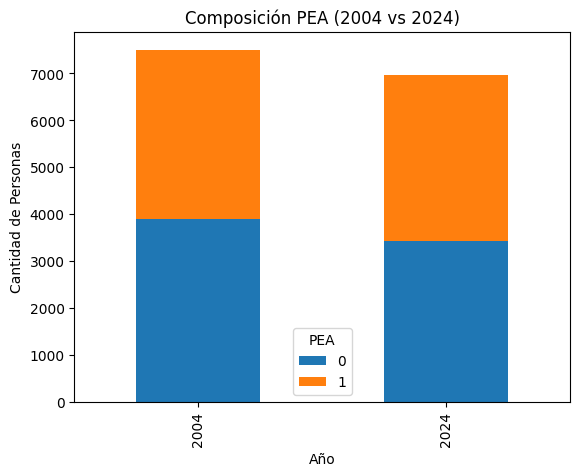

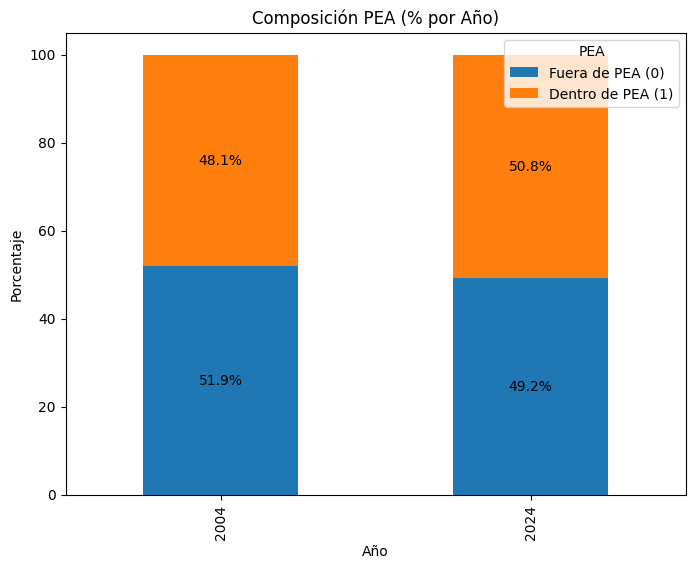

In [40]:
# PEA: 1 si ocupados o desocupados
respondieron.loc[:, 'PEA'] = respondieron['estado'].apply(lambda x: 1 if x in [1, 2] else 0)

# Gráfico por PEA
pea_counts = respondieron.groupby(['AÑO', 'PEA']).size().unstack()

pea_counts.plot(kind='bar', stacked=True)
plt.title('Composición PEA (2004 vs 2024)')
plt.ylabel('Cantidad de Personas')
plt.xlabel('Año')
plt.show()


# Convertimos los conteos a proporciones (porcentaje)
pea_porcentaje = pea_counts.div(pea_counts.sum(axis=1), axis=0) * 100

# Graficar las proporciones como barras apiladas
fig, ax = plt.subplots(figsize=(8, 6))
peag = pea_porcentaje.plot(kind='bar', stacked=True, ax=ax)

# Agregar etiquetas de porcentaje
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Evitar etiquetas para segmentos de tamaño 0
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=10)

# Personalizar el gráfico
plt.title('Composición PEA (% por Año)')
plt.ylabel('Porcentaje')
plt.xlabel('Año')
plt.legend(title='PEA', labels=['Fuera de PEA (0)', 'Dentro de PEA (1)'])
plt.show()

Agreguen a la base respondieron una columna llamada PET (Población en Edad para Trabajar) que tome 1 si están la persona tiene entre 15 y 65 años cumplidos. Realicen un gráfico de barras mostrando la composición por PEA para 2004 y 2024. Comenten los resultados y compare PET con PEA.

C:\Users\Marcia Lopez\AppData\Local\Temp\ipykernel_1152\1660682099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.loc[:, 'PET'] = respondieron['ch06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)


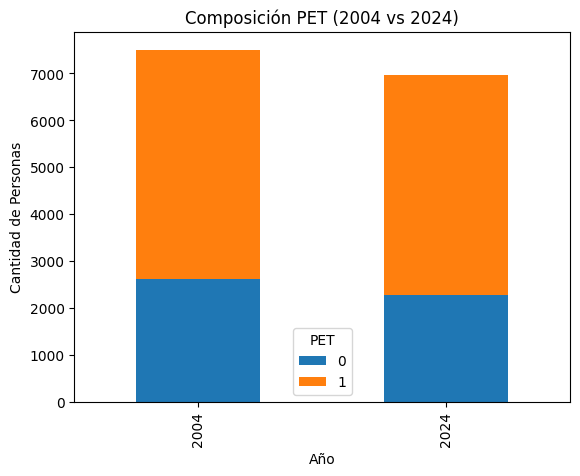

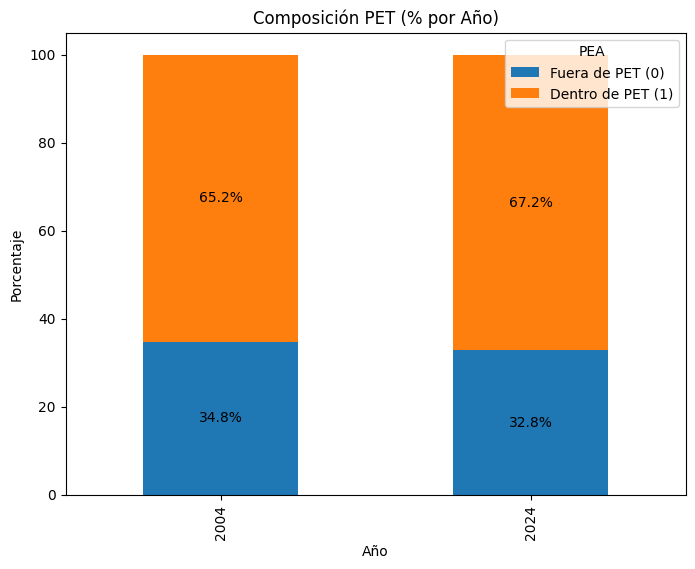

In [41]:
# PET: 1 si edad entre 15 y 65 años
respondieron.loc[:, 'PET'] = respondieron['ch06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)

# Comparar PET y PEA
pet_counts = respondieron.groupby(['AÑO', 'PET']).size().unstack()

pet_counts.plot(kind='bar', stacked=True)
plt.title('Composición PET (2004 vs 2024)')
plt.ylabel('Cantidad de Personas')
plt.xlabel('Año')
plt.show()

# Convertimos los conteos a proporciones (porcentaje)
pet_porcentaje = pet_counts.div(pet_counts.sum(axis=1), axis=0) * 100

# Graficar las proporciones como barras apiladas
fig, ax = plt.subplots(figsize=(8, 6))
pet = pet_porcentaje.plot(kind='bar', stacked=True, ax=ax)

# Agregar etiquetas de porcentaje
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Evitar etiquetas para segmentos de tamaño 0
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=10)

# Personalizar el gráfico
plt.title('Composición PET (% por Año)')
plt.ylabel('Porcentaje')
plt.xlabel('Año')
plt.legend(title='PEA', labels=['Fuera de PET (0)', 'Dentro de PET (1)'])
plt.show()

C:\Users\Marcia Lopez\AppData\Local\Temp\ipykernel_1152\1269819227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.loc[:, 'desocupado'] = respondieron['estado'].apply(lambda x: 1 if x == 2 else 0)


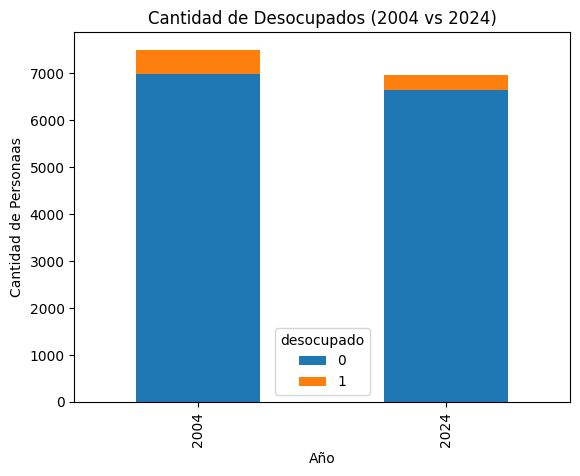

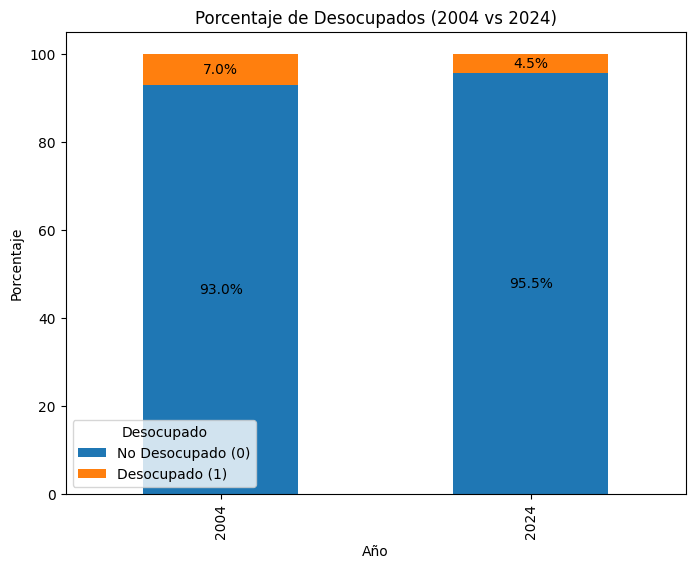

In [42]:
# Desocupado: 1 si ESTADO = 2
respondieron.loc[:, 'desocupado'] = respondieron['estado'].apply(lambda x: 1 if x == 2 else 0)

# Comparar desocupados por año
desocupados_por_año = respondieron.groupby(['AÑO', 'desocupado']).size().unstack()

desocupados_por_año.plot(kind='bar', stacked=True)
plt.title('Cantidad de Desocupados (2004 vs 2024)')
plt.ylabel('Cantidad de Personaas')
plt.xlabel('Año')
plt.show()

# Convertir los conteos a proporciones (porcentaje)
desocupados_por_año_porcentaje = desocupados_por_año.div(desocupados_por_año.sum(axis=1), axis=0) * 100

# Graficar las proporciones como barras apiladas
fig, ax = plt.subplots(figsize=(8, 6))
desocupados_por_año_porcentaje.plot(kind='bar', stacked=True, ax=ax)

# Agregar etiquetas de porcentaje
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Evitar etiquetas para segmentos vacíos
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=10)

# Personalizar el gráfico
plt.title('Porcentaje de Desocupados (2004 vs 2024)')
plt.ylabel('Porcentaje')
plt.xlabel('Año')
plt.legend(title='Desocupado', labels=['No Desocupado (0)', 'Desocupado (1)'])
plt.show()

In [43]:
print(type(desocupados))
print(type(respondieron))

<class 'int'>
<class 'pandas.core.frame.DataFrame'>


<class 'pandas.core.frame.DataFrame'>
      Tasa INDEC  Tasa Alternativa
AÑO                               
2004    0.070344          0.107909
2024    0.044690          0.066524


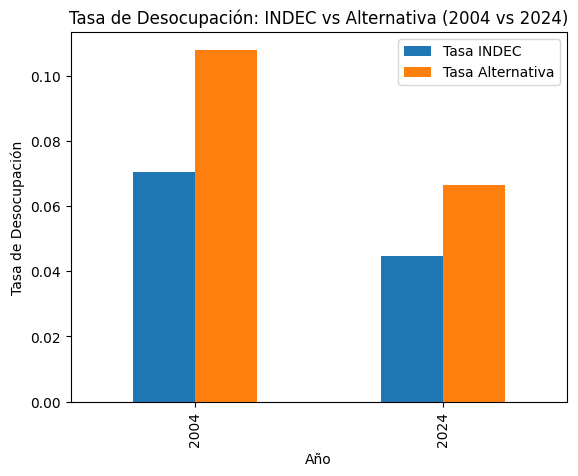

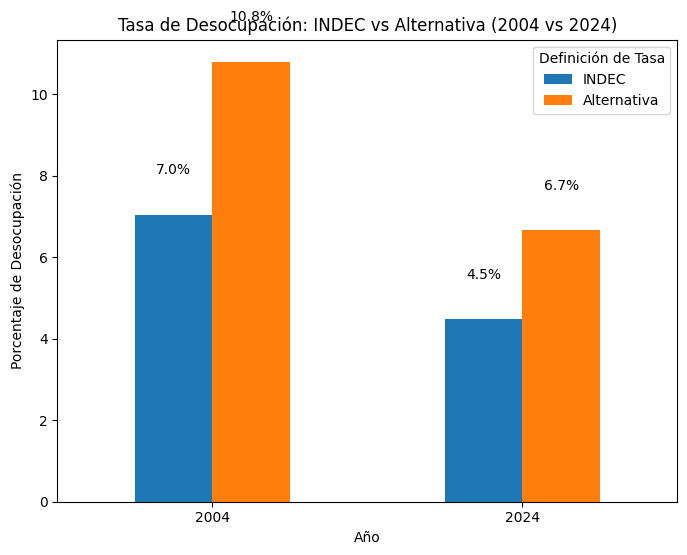

In [44]:
# Tasa de desocupación según INDEC
desocupados = combined_data[combined_data['estado'] == 2]
tasa_indec = desocupados.groupby('AÑO').size() / respondieron.groupby('AÑO').size()

# Tasa alternativa (desocupados / PET)
tasa_alternativa = desocupados.groupby('AÑO').size() / respondieron.groupby('AÑO')['PET'].sum()

# Mostrar en tabla
tasas = pd.DataFrame({'Tasa INDEC': tasa_indec, 'Tasa Alternativa': tasa_alternativa})
print(type(desocupados))
print(tasas)

# Graficar tasas
tasas.plot(kind='bar')
plt.title('Tasa de Desocupación: INDEC vs Alternativa (2004 vs 2024)')
plt.ylabel('Tasa de Desocupación')
plt.xlabel('Año')
plt.show()

# Convertir las tasas a porcentajes
tasas_porcentaje = tasas * 100

# Graficar las tasas como porcentajes
fig, ax = plt.subplots(figsize=(8, 6))
tasas_porcentaje.plot(kind='bar', ax=ax)

# Agregar etiquetas de porcentaje
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Evitar etiquetas para barras vacías
        ax.text(x + width / 2, y + height + 1, f'{height:.1f}%', ha='center', fontsize=10)

# Personalizar el gráfico
plt.title('Tasa de Desocupación: INDEC vs Alternativa (2004 vs 2024)')
plt.ylabel('Porcentaje de Desocupación')
plt.xlabel('Año')
plt.xticks(rotation=0)  # Mantener las etiquetas del eje X horizontales
plt.legend(title='Definición de Tasa', labels=['INDEC', 'Alternativa'])
plt.show()

# Desventaja: la alternativa puede sobreestimar la tasa real como se evidencia en las tablas y gráficos si hay muchos inactivos por motivos que les impiden trabajar, como estudios.

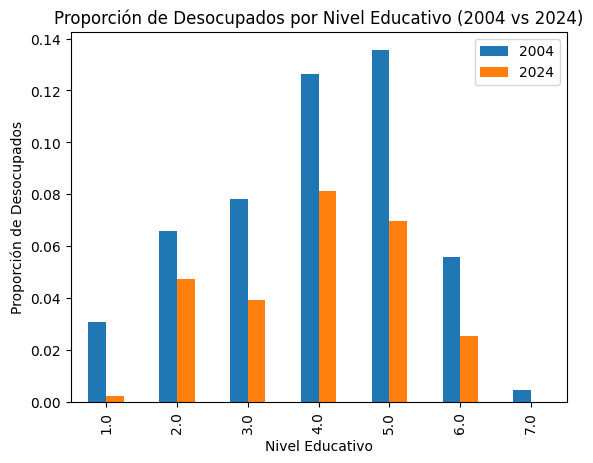

In [45]:
# Proporción de desocupados por nivel educativo
nivel_educativo_2004 = respondieron.loc[2004].groupby('nivel_ed')['desocupado'].mean()
nivel_educativo_2024 = respondieron.loc[2024].groupby('nivel_ed')['desocupado'].mean()

# Comparar en un gráfico
nivel_educativo = pd.DataFrame({
    '2004': nivel_educativo_2004,
    '2024': nivel_educativo_2024
})

nivel_educativo.plot(kind='bar')
plt.title('Proporción de Desocupados por Nivel Educativo (2004 vs 2024)')
plt.ylabel('Proporción de Desocupados')
plt.xlabel('Nivel Educativo')
plt.show()

C:\Users\Marcia Lopez\AppData\Local\Temp\ipykernel_1152\881330252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.loc[:, 'EDAD_GROUP'] = pd.cut(respondieron['ch06'], bins=range(0, 100, 10), right=False)


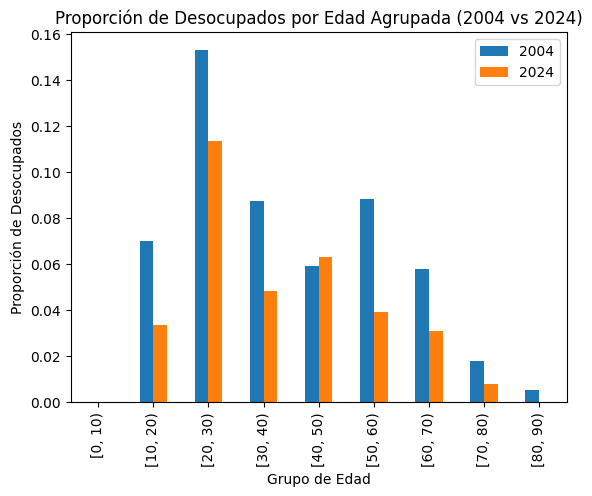

In [46]:
# Crear una variable categórica de edad agrupada
respondieron.loc[:, 'EDAD_GROUP'] = pd.cut(respondieron['ch06'], bins=range(0, 100, 10), right=False)

# Proporción de desocupados por edad agrupada
edad_agrupada_2004 = respondieron.loc[2004].groupby('EDAD_GROUP', observed=False)['desocupado'].mean()
edad_agrupada_2024 = respondieron.loc[2024].groupby('EDAD_GROUP', observed=False)['desocupado'].mean()

# Comparar en un gráfico
edad_agrupada = pd.DataFrame({
    '2004': edad_agrupada_2004,
    '2024': edad_agrupada_2024
})

edad_agrupada.plot(kind='bar')
plt.title('Proporción de Desocupados por Edad Agrupada (2004 vs 2024)')
plt.ylabel('Proporción de Desocupados')
plt.xlabel('Grupo de Edad')
plt.show()

In [47]:
print(respondieron.columns.tolist())

['codusu', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre', 'region', 'mas_500', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e', 'pp02h', 'pp02i', 'pp03c', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', 'pp04b1', 'pp04b2', 'pp04b3_mes', 'pp04b3_ano', 'pp04b3_dia', 'pp04c', 'pp04c99', 'pp04d_cod', 'pp04g', 'pp05b2_mes', 'pp05b2_ano', 'pp05b2_dia', 'pp05c_1', 'pp05c_2', 'pp05c_3', 'pp05e', 'pp05f', 'pp05h', 'pp06a', 'pp06c', 'pp06d', 'pp06e', 'pp06h', 'pp07a', 'pp07c', 'pp07d', 'pp07e', 'pp07f1', 'pp07f2', 'pp07f3', 'pp07f4', 'pp07f5', 'pp07g1', 'pp07g2', 'pp07g3', 'pp07g4', 'pp07g_59', 'pp07h', 'pp07i', 'pp07j', 'pp07k', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 'pp08j1', 'pp08j2', 'pp08j3', '

In [48]:
respondieron['estado'] = respondieron['estado'].apply(lambda x: 1 if x == 1 else 0)

C:\Users\Marcia Lopez\AppData\Local\Temp\ipykernel_1152\887862012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['estado'] = respondieron['estado'].apply(lambda x: 1 if x == 1 else 0)


Análisis para el año 2004

Modelo: Regresión Logística para el año 2004
Matriz de Confusión:
[[1122  206]
 [ 557  367]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.67      0.84      0.75      1328
           1       0.64      0.40      0.49       924

    accuracy                           0.66      2252
   macro avg       0.65      0.62      0.62      2252
weighted avg       0.66      0.66      0.64      2252

Accuracy: 0.661190053285968
AUC para la clase binaria: 0.7335608668439993


C:\Users\Marcia Lopez\AppData\Local\Temp\ipykernel_1152\950277053.py:14: DtypeWarning: Columns (0,20,22,24,50,58,103,109,116,131,132,133,134,135,136,140,143,160,163,167,170,176) have mixed types. Specify dtype option on import or set low_memory=False.
  respondieron = pd.read_csv(respondieron_path)


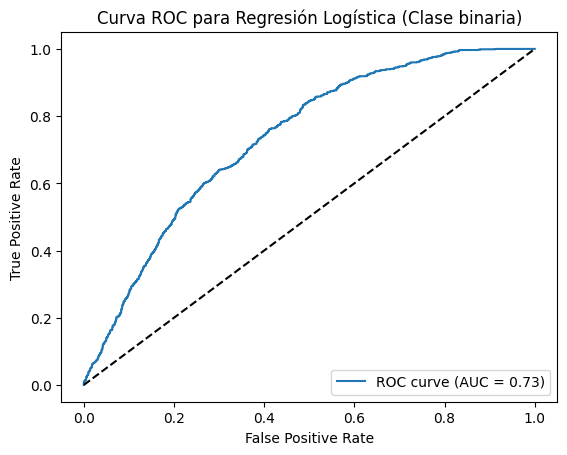


Modelo: LDA para el año 2004
Matriz de Confusión:
[[1128  200]
 [ 563  361]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.67      0.85      0.75      1328
           1       0.64      0.39      0.49       924

    accuracy                           0.66      2252
   macro avg       0.66      0.62      0.62      2252
weighted avg       0.66      0.66      0.64      2252

Accuracy: 0.661190053285968
AUC para la clase binaria: 0.7231050826683356


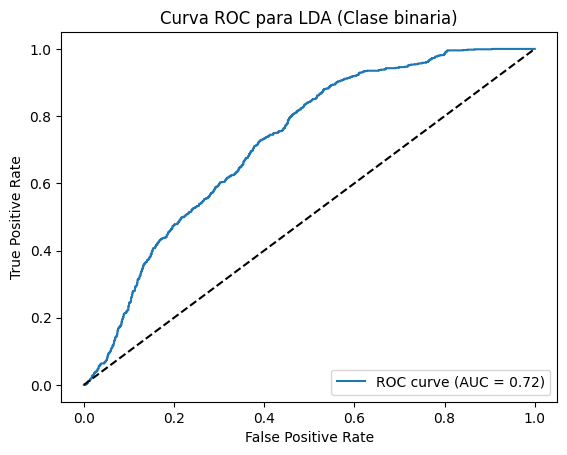


Modelo: KNN (k=3) para el año 2004
Matriz de Confusión:
[[1073  255]
 [ 218  706]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1328
           1       0.73      0.76      0.75       924

    accuracy                           0.79      2252
   macro avg       0.78      0.79      0.78      2252
weighted avg       0.79      0.79      0.79      2252

Accuracy: 0.7899644760213144
AUC para la clase binaria: 0.8416731047566891


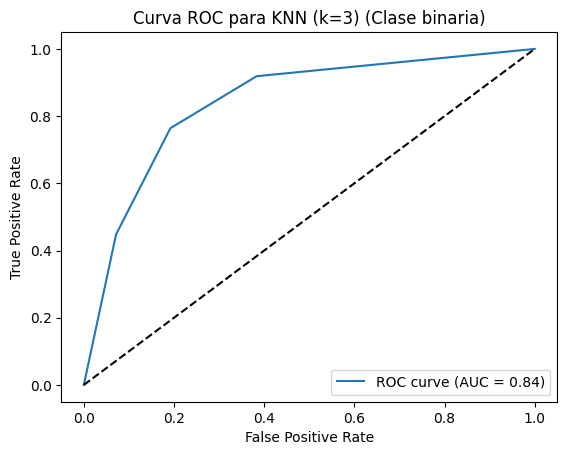


Modelo: Naive Bayes para el año 2004
Matriz de Confusión:
[[1294   34]
 [ 798  126]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.62      0.97      0.76      1328
           1       0.79      0.14      0.23       924

    accuracy                           0.63      2252
   macro avg       0.70      0.56      0.49      2252
weighted avg       0.69      0.63      0.54      2252

Accuracy: 0.6305506216696269
AUC para la clase binaria: 0.8713017655035727


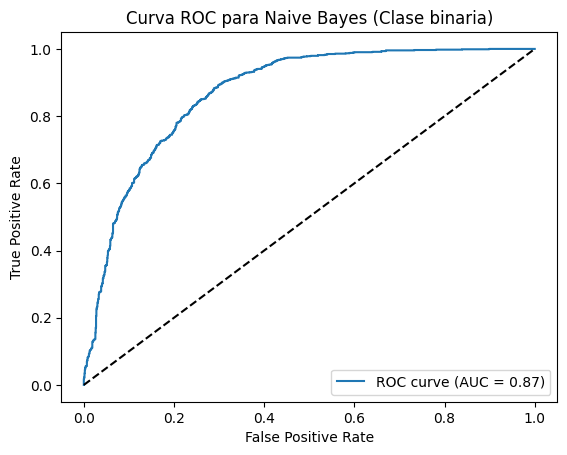

Análisis para el año 2024

Modelo: Regresión Logística para el año 2024
Matriz de Confusión:
[[808 313]
 [474 493]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.63      0.72      0.67      1121
           1       0.61      0.51      0.56       967

    accuracy                           0.62      2088
   macro avg       0.62      0.62      0.61      2088
weighted avg       0.62      0.62      0.62      2088

Accuracy: 0.6230842911877394
AUC para la clase binaria: 0.6868963945804778


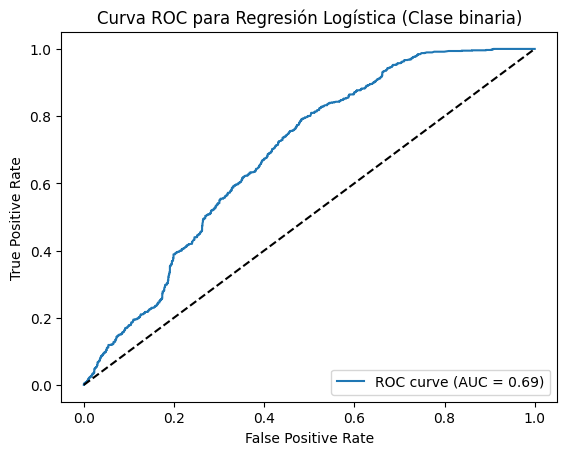


Modelo: LDA para el año 2024
Matriz de Confusión:
[[807 314]
 [469 498]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.63      0.72      0.67      1121
           1       0.61      0.51      0.56       967

    accuracy                           0.62      2088
   macro avg       0.62      0.62      0.62      2088
weighted avg       0.62      0.62      0.62      2088

Accuracy: 0.625
AUC para la clase binaria: 0.6852100586066325


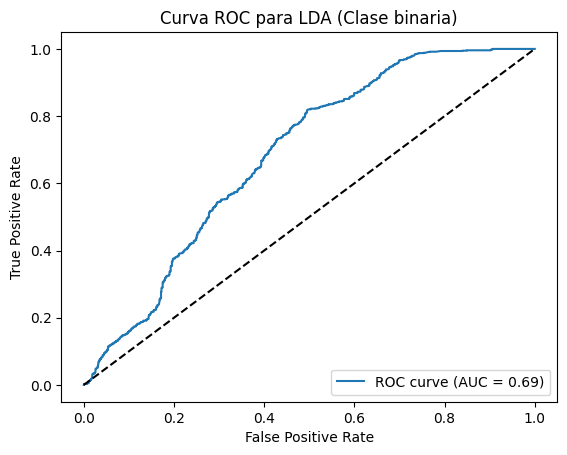


Modelo: KNN (k=3) para el año 2024
Matriz de Confusión:
[[878 243]
 [225 742]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1121
           1       0.75      0.77      0.76       967

    accuracy                           0.78      2088
   macro avg       0.77      0.78      0.77      2088
weighted avg       0.78      0.78      0.78      2088

Accuracy: 0.7758620689655172
AUC para la clase binaria: 0.8334429574716768


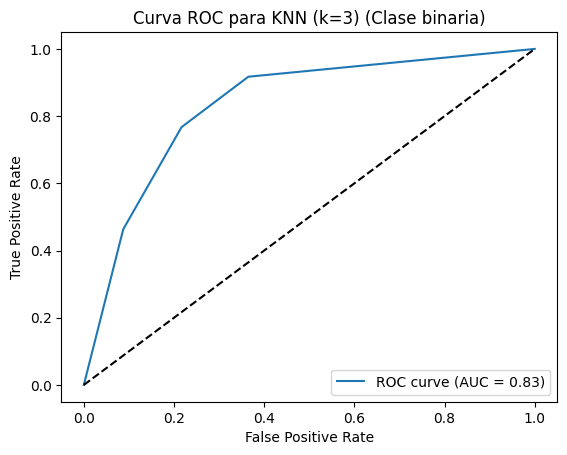


Modelo: Naive Bayes para el año 2024
Matriz de Confusión:
[[1058   63]
 [ 603  364]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.64      0.94      0.76      1121
           1       0.85      0.38      0.52       967

    accuracy                           0.68      2088
   macro avg       0.74      0.66      0.64      2088
weighted avg       0.74      0.68      0.65      2088

Accuracy: 0.6810344827586207
AUC para la clase binaria: 0.8550558252852611


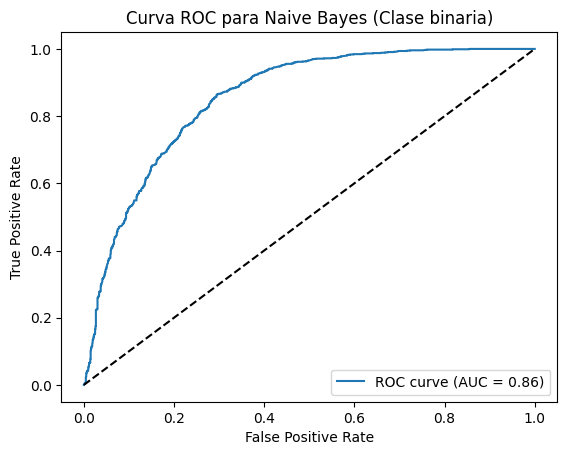

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
from sklearn.preprocessing import StandardScaler

ruta_base = r"C:\Users\Marcia Lopez\Desktop\pruebas\TP3"
respondieron_path = f"{ruta_base}\\respondieron.csv"
respondieron = pd.read_csv(respondieron_path)

variables_interes = ['ano4', 'ch04', 'ch06', 'ipcf', 'nivel_ed', 'estado']  # Ajustar según las variables relevantes
respondieron = respondieron[variables_interes]

respondieron['estado'] = respondieron['estado'].apply(lambda x: 1 if x == 1 else 0)

for year in [2004, 2024]:  # Ajustar los años según sea necesario
    print(f"Análisis para el año {year}")
    
    data_year = respondieron[respondieron['ano4'] == year]
    
    # Variables independientes y dependientes
    X = data_year.drop(columns=['estado'])  # Variables independientes
    y = data_year['estado']  # Variable dependiente
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)
    
    X_train = np.c_[np.ones(X_train.shape[0]), X_train]  
    X_test = np.c_[np.ones(X_test.shape[0]), X_test]  
    
    scaler = StandardScaler()
    X_train[:, 1:] = scaler.fit_transform(X_train[:, 1:])  
    X_test[:, 1:] = scaler.transform(X_test[:, 1:])  
    
    modelos = {
        'Regresión Logística': LogisticRegression(max_iter=1000),
        'LDA': LinearDiscriminantAnalysis(),
        'KNN (k=3)': KNeighborsClassifier(n_neighbors=3),
        'Naive Bayes': GaussianNB()
    }
    
    for nombre_modelo, modelo in modelos.items():
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        
        print(f"\nModelo: {nombre_modelo} para el año {year}")
        
        # Matriz de confusión
        print("Matriz de Confusión:")
        print(confusion_matrix(y_test, y_pred))
        
        # Reporte de clasificación
        print("Reporte de Clasificación:")
        print(classification_report(y_test, y_pred))
        
        # AUC y Accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy}")
        

        if hasattr(modelo, "predict_proba"):
            # Calcular la probabilidad predicha para la clase positiva (1)
            y_proba = modelo.predict_proba(X_test)[:, 1]
            
            # Graficar la curva ROC
            fpr, tpr, thresholds = roc_curve(y_test, y_proba)
            auc_value = auc(fpr, tpr)
            print(f"AUC para la clase binaria: {auc_value}")
            
            # Graficar la curva ROC
            plt.figure()
            plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_value:.2f})')
            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'Curva ROC para {nombre_modelo} (Clase binaria)')
            plt.legend(loc="lower right")
            plt.show()
        else:
            print("AUC no disponible para este modelo")

Matriz de Confusión:
[[1789  637]
 [1033  881]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.63      0.74      0.68      2426
           1       0.58      0.46      0.51      1914

    accuracy                           0.62      4340
   macro avg       0.61      0.60      0.60      4340
weighted avg       0.61      0.62      0.61      4340


AUC: 0.6952572531466412


C:\Users\Marcia Lopez\AppData\Local\Temp\ipykernel_1152\728994500.py:12: DtypeWarning: Columns (0,20,22,24,50,58,103,109,116,131,132,133,134,135,136,140,143,160,163,167,170,176) have mixed types. Specify dtype option on import or set low_memory=False.
  respondieron = pd.read_csv(respondieron_path)


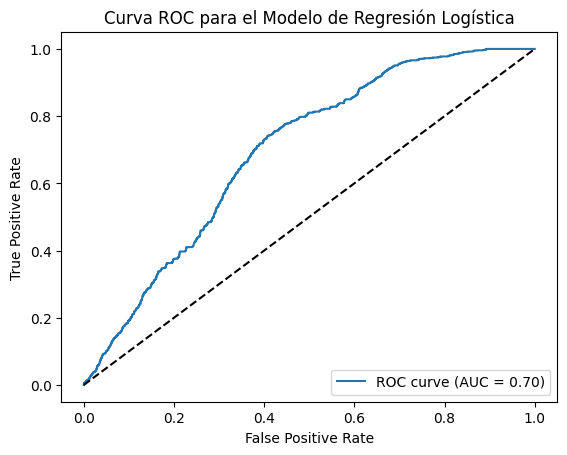


Proporción de personas identificadas como desocupadas: 0.31


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

ruta_base = r"C:\Users\Marcia Lopez\Desktop\pruebas\TP3"
respondieron_path = f"{ruta_base}\\respondieron.csv"
norespondieron_path = f"{ruta_base}\\norespondieron.csv"

respondieron = pd.read_csv(respondieron_path)
norespondieron = pd.read_csv(norespondieron_path)

variables_interes = ['ch04', 'ch06', 'ipcf', 'nivel_ed', 'estado']  
respondieron = respondieron[variables_interes]
norespondieron = norespondieron[variables_interes[:-1]]  

respondieron['estado'] = respondieron['estado'].apply(lambda x: 1 if x == 1 else 0)

X = respondieron.drop(columns=['estado']) 
y = respondieron['estado']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Generar la curva ROC
y_proba = modelo.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_value = auc(fpr, tpr)
print(f"\nAUC: {auc_value}")

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para el Modelo de Regresión Logística')
plt.legend(loc="lower right")
plt.show()

X_norespondieron = norespondieron  
X_norespondieron_scaled = scaler.transform(X_norespondieron) 

predicciones_norespondieron = modelo.predict(X_norespondieron_scaled)

proporcion_desocupados = sum(predicciones_norespondieron) / len(predicciones_norespondieron)
print(f"\nProporción de personas identificadas como desocupadas: {proporcion_desocupados:.2f}")